In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import plotly.express as px
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.5f' % x)

from tqdm import tqdm
import glob
import sys  
sys.path.insert(0, '/Users/aliakay/Desktop/Suanfarma/nagesh_kommuri/src/')

# importing user-defined functions from udf_eda.py
import udf_eda as udf
import udf_timeseries as udf_ts

In [2]:
file_names = glob.glob('/Users/aliakay/Desktop/Suanfarma/Dataset/ODP *.xlsx')

In [18]:
file_names

['/Users/aliakay/Desktop/Suanfarma/Dataset/ODP 100001575.xlsx',
 '/Users/aliakay/Desktop/Suanfarma/Dataset/ODP 100001580.xlsx',
 '/Users/aliakay/Desktop/Suanfarma/Dataset/ODP 100001579.xlsx',
 '/Users/aliakay/Desktop/Suanfarma/Dataset/ODP 100001778.xlsx',
 '/Users/aliakay/Desktop/Suanfarma/Dataset/ODP 100001700_dati_BHV_CFF_NF_EXT .xlsx',
 '/Users/aliakay/Desktop/Suanfarma/Dataset/ODP 100001770_dati_BHV_CFF_NF_EXT .xlsx',
 '/Users/aliakay/Desktop/Suanfarma/Dataset/ODP 100001779.xlsx',
 '/Users/aliakay/Desktop/Suanfarma/Dataset/ODP 100001780.xlsx',
 '/Users/aliakay/Desktop/Suanfarma/Dataset/ODP 100001578.xlsx',
 '/Users/aliakay/Desktop/Suanfarma/Dataset/ODP 100001581.xlsx',
 '/Users/aliakay/Desktop/Suanfarma/Dataset/ODP 100001777_dati_BHV_CFF_NF_EXT.xlsx',
 '/Users/aliakay/Desktop/Suanfarma/Dataset/ODP 100001574.xlsx',
 '/Users/aliakay/Desktop/Suanfarma/Dataset/ODP 100001776_dati_BHV_CFF_NF_EXT.xlsx',
 '/Users/aliakay/Desktop/Suanfarma/Dataset/ODP 100001695.xlsx',
 '/Users/aliakay/Deskt

In [17]:
file_names[10][50:54]

'1777'

In [14]:
df = udf.read_bind(file_names)

100%|██████████| 45/45 [05:01<00:00,  6.71s/it]


The following batches have incompatible data:  ['1778', '1702', '1576']
# of batches read:  40
Missing batches, if any: {'1777_dati_BHV_CFF_NF_EXT.xlsx', '1696.xlsx', '1573.xlsx', '1772_dati_BHV_CFF_NF_EXT .xlsx', '1703_dati_BHV_CFF_NF_EXT .xlsx', '1699.xlsx', '1582.xlsx', '1580.xlsx', '1579.xlsx', '1698.xlsx', '1770_dati_BHV_CFF_NF_EXT .xlsx', '1705_dati_BHV_CFF_NF_EXT.xlsx', '1700_dati_BHV_CFF_NF_EXT .xlsx', '1576.xlsx', '1771_dati_BHV_CFF_NF_EXT .xlsx', '1950.xlsx', '1512.xlsx', '1775_dati_BHV_CFF_NF_EXT.xlsx', '1949.xlsx', '1584.xlsx', '1768_dati_BHV_CFF_NF_EXT.xlsx', '1572.xlsx', '1769_dati_BHV_CFF_NF_EXT .xlsx', '1575.xlsx', '1511.xlsx', '1510.xlsx', '1578.xlsx', '1773_dati_BHV_CFF_NF_EXT .xlsx', '1574.xlsx', '1774_dati_BHV_CFF_NF_EXT .xlsx', '1581.xlsx', '1704_dati_BHV_CFF_NF_EXT .xlsx', '1778.xlsx', '1776_dati_BHV_CFF_NF_EXT.xlsx', '1780.xlsx', '1697.xlsx', '1577.xlsx', '1583.xlsx', '1695.xlsx', '1779.xlsx', '1702_dati_BHV_CFF_NF_EXT .xlsx', '1701_dati_BHV_CFF_NF_EXT .xlsx', '1

In [19]:
df.shape

(52924, 385)

In [15]:
df.head()

,id,timeseries,101LI636,101WI610,306LI606,101AI635,101AI605,101TI607,101TI637,306TI604,...,108FI681,Unnamed: 122,Unnamed: 124,Unnamed: 126,Unnamed: 128,Unnamed: 130,Unnamed: 141,Unnamed: 143,Unnamed: 145,Unnamed: 147
0,1575,2021-08-20 00:00:00,95239.45312,91814.19531,25182.37109,5.23519,5.55022,11.55966,13.55579,20.75439,...,0.09696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1575,2021-08-20 00:01:00,95111.75781,91825.67188,25271.34766,5.23304,5.54923,11.54951,13.55198,20.74732,...,0.10512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1575,2021-08-20 00:02:00,94878.88281,91847.96094,25196.70312,5.23574,5.54862,11.54894,13.52405,20.76950,...,0.09847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1575,2021-08-20 00:03:00,94545.03906,91829.58594,25228.94141,5.23677,5.54931,11.54495,13.52895,20.76150,...,0.11235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1575,2021-08-20 00:04:00,94193.06250,91827.96875,25151.67188,5.23716,5.54903,11.54802,13.53150,20.75838,...,0.09851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# if any blank columns are created by accident in a spreadsheet software, which wouldn't have any column name, we remove such columns
df = df[df.columns.drop(list(df.filter(regex='Unnamed:')))]
print("How many NaN values exist in the data: ", df.isna().sum().sum())
print("Shape of the data: ",df.shape)

How many NaN values exist in the data:  130854
Shape of the data:  (52924, 265)


In [21]:
df.head()

,id,timeseries,101LI636,101WI610,306LI606,101AI635,101AI605,101TI607,101TI637,306TI604,...,108PI659,108PI662,108PI663,108FI653,108FI657,108FI665,108FI669,108FI673,108FI677,108FI681
0,1575,2021-08-20 00:00:00,95239.45312,91814.19531,25182.37109,5.23519,5.55022,11.55966,13.55579,20.75439,...,0.15407,-0.02293,0.10924,0.09491,0.09483,0.07764,0.07196,0.10704,0.10380,0.09696
1,1575,2021-08-20 00:01:00,95111.75781,91825.67188,25271.34766,5.23304,5.54923,11.54951,13.55198,20.74732,...,0.15442,-0.01983,0.12208,0.14393,0.10112,0.08284,0.07955,0.11174,0.11294,0.10512
2,1575,2021-08-20 00:02:00,94878.88281,91847.96094,25196.70312,5.23574,5.54862,11.54894,13.52405,20.76950,...,0.14893,-0.01996,0.12435,0.11798,0.09894,0.08540,0.07455,0.10556,0.10811,0.09847
3,1575,2021-08-20 00:03:00,94545.03906,91829.58594,25228.94141,5.23677,5.54931,11.54495,13.52895,20.76150,...,0.15442,-0.01533,0.11589,0.11692,0.10075,0.08178,0.08133,0.11209,0.10643,0.11235
4,1575,2021-08-20 00:04:00,94193.06250,91827.96875,25151.67188,5.23716,5.54903,11.54802,13.53150,20.75838,...,0.15442,-0.02608,0.11170,0.18157,0.09806,0.08417,0.08567,0.10970,0.10539,0.09851


In [22]:
df.id.unique()

<StringArray>
['1575', '1580', '1579', '1700', '1770', '1779', '1780', '1578', '1581',
 '1574', '1776', '1695', '1512', '1949', '1699', '1772', '1698', '1948',
 '1572', '1952', '1768', '1510', '1697', '1584', '1704', '1773', '1774',
 '1703', '1769', '1696', '1511', '1950', '1577', '1705', '1767', '1771',
 '1582', '1583', '1701', '1775']
Length: 40, dtype: string

In [23]:
df = df[df.id != '1510']
print("How many NaN values exist in the data: ", df.isna().sum().sum())
print("Shape of the data: ",df.shape)

How many NaN values exist in the data:  0
Shape of the data:  (51766, 265)


In [24]:
# Extracting the Resa variable from produzione_CStOA_2021_ed12.xlsx
tdf = pd.read_excel('/Users/aliakay/Desktop/Suanfarma/Dataset/produzione_CStOA_2021_ed12.xlsx', sheet_name="dati-produzione", header=1)
tdf = tdf[['O.D.P.','Resa']]
tdf.dropna(axis=0, how='any', inplace=True)
tdf['O.D.P.'] =tdf['O.D.P.'].astype(int).astype(str).str[-4:]
tdf.columns = ['id', 'result']
tdf.result = round(tdf.result,3)

In [25]:
tdf[tdf["id"]=="1572"]

,id,result
166,1572,0.76400


In [26]:
df=tdf.merge(df, how='inner')

In [27]:
tdf = df.groupby(['id'])['timeseries'].agg(['min', 'max']).reset_index()
tdf.columns = ['id', 'start_date', 'end_date']
tdf['processing_time_mins'] = ((tdf['end_date'] - tdf['start_date'])/pd.Timedelta(minutes = 1))+1
df = tdf.merge(df, how = 'right')
df.insert(5, 'timestamp_index', df.groupby('id').cumcount())

In [28]:
#The 1st and 99th percentile of column df['DIAFTOTALE'] is [-0.0034383377374990823, 2.228056874225769]. 
#So, it is safe to set the lower and upper bounds for this columns as [-1,+3]
# for i in range(0, 101, 1):    
#     print(df['DIAFTOTALE'].quantile(i/1000))
df.loc[df['DIAFTOTALE'] > 3, 'DIAFTOTALE'] = 2.59
df.loc[df['DIAFTOTALE'] < -1, 'DIAFTOTALE'] = -0.4

In [29]:
batch_id = list(df['id'].unique())
VOI_mean = ['101LI636', 'DIAFTOTALE', '107LI606', '113LI682']
lst = []

for i in batch_id:
    for j in VOI_mean:
        data = df.loc[df['id'] == i, j]
        #create 95% confidence interval for t distribution and normal distribution population mean
        x = st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))
        y = st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))
        lst.append([i, j, np.mean(data), x[0], x[1], y[0], y[1]])
data = pd.DataFrame(lst, columns= ['batch_id', 'variable', 'mean', 't_dist_mean_lcb', 't_dist_mean_ucb', 'norm_dist_mean_lcb', 'norm_dist_mean_ucb'])


In [30]:
for i in VOI_mean:
    print("Lets take a look at mean distributions from all batches for variable: ", i)
    display(data.loc[data['variable'] == i].reset_index(drop=True))

Lets take a look at mean distributions from all batches for variable:  101LI636


,batch_id,variable,mean,t_dist_mean_lcb,t_dist_mean_ucb,norm_dist_mean_lcb,norm_dist_mean_ucb
0,1511,101LI636,55350.19741,53428.33686,57272.05797,53430.39536,57269.99946
1,1512,101LI636,70409.93433,69061.48141,71758.38726,69062.63893,71757.22974
2,1572,101LI636,58062.70010,56262.31391,59863.08629,56263.87822,59861.52197
3,1574,101LI636,66418.65533,65035.76093,67801.54972,65036.94048,67800.37017
4,1575,101LI636,58052.95372,56284.66877,59821.23867,56286.01568,59819.89176
5,1577,101LI636,79453.16679,78706.93265,80199.40093,78707.62265,80198.71094
6,1578,101LI636,77208.10429,76169.82693,78246.38166,76170.76544,78245.44314
7,1579,101LI636,59873.05979,58102.30075,61643.81883,58103.91584,61642.20373
8,1580,101LI636,60249.14480,58518.40035,61979.88925,58520.12446,61978.16513
9,1581,101LI636,56078.07959,54248.78323,57907.37595,54250.76539,57905.39379


Lets take a look at mean distributions from all batches for variable:  DIAFTOTALE


,batch_id,variable,mean,t_dist_mean_lcb,t_dist_mean_ucb,norm_dist_mean_lcb,norm_dist_mean_ucb
0,1511,DIAFTOTALE,1.38613,1.35026,1.42200,1.35029,1.42197
1,1512,DIAFTOTALE,1.66339,1.65752,1.66926,1.65752,1.66925
2,1572,DIAFTOTALE,1.48742,1.45567,1.51918,1.45569,1.51915
3,1574,DIAFTOTALE,1.61954,1.59074,1.64833,1.59076,1.64831
4,1575,DIAFTOTALE,1.35417,1.32306,1.38528,1.32309,1.38526
5,1577,DIAFTOTALE,1.50940,1.47991,1.53889,1.47994,1.53886
6,1578,DIAFTOTALE,1.50737,1.47545,1.53929,1.47548,1.53926
7,1579,DIAFTOTALE,1.57781,1.54917,1.60645,1.54919,1.60642
8,1580,DIAFTOTALE,1.63889,1.60806,1.66972,1.60809,1.66969
9,1581,DIAFTOTALE,1.59220,1.55907,1.62534,1.55911,1.62530


Lets take a look at mean distributions from all batches for variable:  107LI606


,batch_id,variable,mean,t_dist_mean_lcb,t_dist_mean_ucb,norm_dist_mean_lcb,norm_dist_mean_ucb
0,1511,107LI606,15.37737,14.94423,15.81051,14.94470,15.81005
1,1512,107LI606,24.55203,23.94331,25.16076,23.94383,25.16023
2,1572,107LI606,15.86725,15.30089,16.43360,15.30138,16.43311
3,1574,107LI606,14.71150,14.24169,15.18131,14.24209,15.18091
4,1575,107LI606,34.21311,33.19667,35.22954,33.19744,35.22877
5,1577,107LI606,24.19987,23.54581,24.85393,23.54641,24.85333
6,1578,107LI606,14.14113,13.81450,14.46777,13.81479,14.46747
7,1579,107LI606,12.74015,12.43993,13.04037,12.44021,13.04009
8,1580,107LI606,8.55386,8.34829,8.75944,8.34850,8.75923
9,1581,107LI606,13.95756,13.67765,14.23748,13.67795,14.23717


Lets take a look at mean distributions from all batches for variable:  113LI682


,batch_id,variable,mean,t_dist_mean_lcb,t_dist_mean_ucb,norm_dist_mean_lcb,norm_dist_mean_ucb
0,1511,113LI682,25.39996,24.71404,26.08589,24.71478,26.08515
1,1512,113LI682,21.25467,20.95499,21.55436,20.95524,21.55410
2,1572,113LI682,17.87364,17.62574,18.12155,17.62595,18.12133
3,1574,113LI682,20.40690,20.11840,20.69539,20.11865,20.69515
4,1575,113LI682,19.25799,19.01694,19.49904,19.01713,19.49885
5,1577,113LI682,18.65639,18.37424,18.93855,18.37450,18.93829
6,1578,113LI682,18.96014,18.67167,19.24862,18.67193,19.24836
7,1579,113LI682,19.00882,18.71711,19.30054,18.71738,19.30027
8,1580,113LI682,19.81293,19.47892,20.14694,19.47925,20.14660
9,1581,113LI682,19.05155,18.72953,19.37358,18.72988,19.37323


In [35]:
col_irregularities = df.nunique()[df.nunique()<=2].keys()
for i in col_irregularities:
    print("Column {col_} has just these values: {list_}".format(col_=i, list_=df[i].unique()))
# lets remove columns with constant values
# df.drop(columns = col_irregularities.values, inplace= True)

Column 158PIC678_823 has just these values: [0.]
Column 118FI913 has just these values: [32000.]


In [36]:
cols_BHV = ['101LI636', '101WI610', '306LI606', '101AI635', '101AI605', '101TI607', '101TI637', '306TI604', '306LI606', '158PI678', '101PI602', '101PI603', '158PIC678_823', '158PIC678_824', '99TI620', '99PI621', '99AI622', '99AI623', '99AI624']
cols_CFF = ['158FI652', '158FI654', '158FI656', '158FI666', '158FI667', '158FI679P', '158PI651', '158PI653', '158PI655', '158PI663', '158PI678', '158TI650', '158TIC650', '159FI652', '159FI654', '159FI656', '159FI666', '159FI667', '159PI651', '159PI653', '159PI655', '159PI663', '159TI650', '159TIC650', '160FI652', '160FI654', '160FI656', '160FI666', '160FI667', '160PI651', '160PI653', '160PI655', '160PI663', '160TI650', '160TIC650', '161FI652', '161FI654', '161FI656', '161FI666', '161FI667', '161PI651', '161PI653', '161PI655', '161PI663', '161TI650', '161TIC650', '162FI652', '162FI654', '162FI656', '162FI666', '162FI667', '162PI651', '162PI653', '162PI655', '162PI663', '162TI650', '162TIC650', '163FI652', '163FI654', '163FI656', '163FI666', '163FI667', '163PI651', '163PI653', '163PI655', '163PI663', '163TI650', '163TIC650', '164FI652', '164FI654', '164FI656', '164FI666', '164FI667', '164PI651', '164PI653', '164PI655', '164PI663', '164TI650', '164TIC650', '165FI652', '165FI654', '165FI656', '165FI666', '165FI667', '165PI651', '165PI653', '165PI655', '165PI663', '165TI650', '165TIC650', '158CAL4551', '158CAL4552', '159CAL4551', '159CAL4552', '160CAL4551', '160CAL4552', '161CAL4551', '161CAL4552', '162CAL4551', '162CAL4552', '163CAL4551', '163CAL4552', '164CAL4551', '164CAL4552', '165CAL4551', '165CAL4552', 'DWTOTALE', 'PERMTOTALE', 'DIAFTOTALE', 'CONCTOTALE', '158TI684', '158TI670', '158TI672', '158TI673']
cols_NF = ['107LI606', '107TI607', '107PI608', '107AI610', '107TI652', '107TI656', '107TI660', '107TI664', '107TI668', '107PI650', '107PI651', '107PI654', '107PI655', '107PI658', '107PI659', '107PI682A', '107PI684A', '107PI686A', '107PI688A', '107PI690A', '107PI692A', '107FI681A', '107FI696A', '107FI685A', '107FI689A', '107FI693A', '107AI672', '108AI610', '107AI673A', '107AI674A', '107AI677A', '108AI611', '108AI612', '108AI613', '108TI652', '108TI656', '108TI660', '108TI664', '108PI650', '108PI651', '108PI654', '108PI655', '108PI658', '108PI659', '108PI662', '108PI663', '108FI653', '108FI657', '108FI665', '108FI669', '108FI673', '108FI677', '108FI681']
cols_EXT = ['118PI619', '118PI618', '118PI914', '118PI950', '118PI954', '118PI915', '118PI916', '118PI917', '118TI609', '118TI970', '118TI971', '118TI972', '118TI973', '118TI977', '118TI978', '118EI610', '118EI620', '118EI630', '118EI640', '118SI613', '118SI623', '118SI633', '118SI643', '118FI983', '118FI638', '118AI611', '118AI621', '118AI631', '118AI641', '118AI627', '118AI616', '118FI602', '118FI601', '118FI602', '109LI606', '109FI616', '118FI982', '118FI606', '118FIC606', '118CV502', '118CV501', '890PI610', '118FQ602', '118ZLH303', '118LS960', '118LS690', '118ZLL417', '118ZLL427', '118ZLL437', '118ZLL447', '118FI912', '118FI913', '118PI629', '118PI628', '118PI924', '118PI951', '118PI964', '118PI925', '118PI926', '118PI927', '118PI639', '118PI638', '118PI934', '118PI952', '118PI974', '118PI935', '118PI936', '118PI937', '118PI649', '118PI648', '118PI944', '118PI953', '118PI984', '118PI945', '118PI946', '118PI947', '113LI682', '113LI682']

In [37]:
print(df.columns)
print(len(cols_BHV) + len(cols_CFF) + len(cols_NF) + len(cols_EXT))

Index(['id', 'start_date', 'end_date', 'processing_time_mins', 'result',
       'timestamp_index', 'timeseries', '101LI636', '101WI610', '306LI606',
       ...
       '108PI659', '108PI662', '108PI663', '108FI653', '108FI657', '108FI665',
       '108FI669', '108FI673', '108FI677', '108FI681'],
      dtype='object', length=270)
264


In [38]:
describe_df = udf.describe(df).T
describe_df.loc[describe_df['dtype'] == 'bool'].index

Index([], dtype='object')

In [39]:
x_df = df[df.columns.drop('timestamp_index')].groupby(['id', 'start_date', 'end_date', 'processing_time_mins', 'result']).describe()
x_df.columns = ['_'.join(col).strip() for col in x_df.columns.values]
x_df.reset_index(inplace=True)
x_df = x_df[x_df.columns.drop(list(x_df.filter(regex='_count')))]

In [40]:
x_df.head()

,id,start_date,end_date,processing_time_mins,result,101LI636_mean,101LI636_std,101LI636_min,101LI636_25%,101LI636_50%,...,108FI677_50%,108FI677_75%,108FI677_max,108FI681_mean,108FI681_std,108FI681_min,108FI681_25%,108FI681_50%,108FI681_75%,108FI681_max
0,1511,2021-08-12 15:45:00,2021-08-13 10:35:00,1131.00000,0.77300,55350.19741,32941.21876,2185.10132,23410.66797,67335.50781,...,0.11085,0.11357,0.12247,0.10193,0.00672,0.07708,0.09735,0.10199,0.10658,0.12417
1,1512,2021-08-14 23:30:00,2021-08-15 23:00:00,1411.00000,0.80200,70409.93433,25821.30843,2499.46680,56791.56055,81303.61719,...,0.11294,0.66152,3.47820,0.10160,0.00685,0.08072,0.09668,0.10156,0.10643,0.12276
2,1572,2021-08-16 14:16:00,2021-08-17 13:29:00,1394.00000,0.76400,58062.70010,34266.63481,2260.07129,24109.16309,73949.92578,...,0.11042,0.52341,7.88942,0.09631,0.00872,0.06643,0.09025,0.09621,0.10219,0.12322
3,1574,2021-08-18 19:30:00,2021-08-19 19:09:00,1420.00000,0.74000,66418.65533,26565.28647,2265.06567,48698.20703,77434.46875,...,0.11177,0.77659,7.56835,0.09425,0.00805,0.06874,0.08879,0.09400,0.09976,0.12028
4,1575,2021-08-20 00:00:00,2021-08-21 02:29:00,1590.00000,0.75800,58052.95372,35947.75662,2225.23291,18892.07471,78651.13281,...,0.41814,0.92974,4.68558,0.59415,0.92202,0.07351,0.09497,0.10410,0.85125,9.40296


In [41]:
df.head()

,id,start_date,end_date,processing_time_mins,result,timestamp_index,timeseries,101LI636,101WI610,306LI606,...,108PI659,108PI662,108PI663,108FI653,108FI657,108FI665,108FI669,108FI673,108FI677,108FI681
0,1511,2021-08-12 15:45:00,2021-08-13 10:35:00,1131.00000,0.77300,0,2021-08-12 15:45:00,81477.29688,21599.61719,0.00000,...,0.19053,-0.00131,0.11143,0.07196,0.09553,0.08337,0.09170,0.10912,0.11009,0.10120
1,1511,2021-08-12 15:45:00,2021-08-13 10:35:00,1131.00000,0.77300,1,2021-08-12 15:46:00,81779.82813,22878.83203,0.00000,...,0.19943,-0.00977,0.11113,0.13773,0.10828,0.08770,0.08412,0.11635,0.11269,0.11215
2,1511,2021-08-12 15:45:00,2021-08-13 10:35:00,1131.00000,0.77300,2,2021-08-12 15:47:00,82196.60938,24160.41211,0.00000,...,0.19490,-0.00120,0.10793,0.03334,0.10950,0.09661,0.09661,0.10159,0.11203,0.09815
3,1511,2021-08-12 15:45:00,2021-08-13 10:35:00,1131.00000,0.77300,3,2021-08-12 15:48:00,82719.15625,25430.91016,0.00000,...,0.19552,-0.00595,0.10315,0.03987,0.10044,0.09077,0.09199,0.10551,0.10990,0.09696
4,1511,2021-08-12 15:45:00,2021-08-13 10:35:00,1131.00000,0.77300,4,2021-08-12 15:49:00,83419.19531,26682.87500,0.00000,...,0.19390,-0.00408,0.11148,0.10552,0.09854,0.08863,0.08935,0.11219,0.10966,0.09689


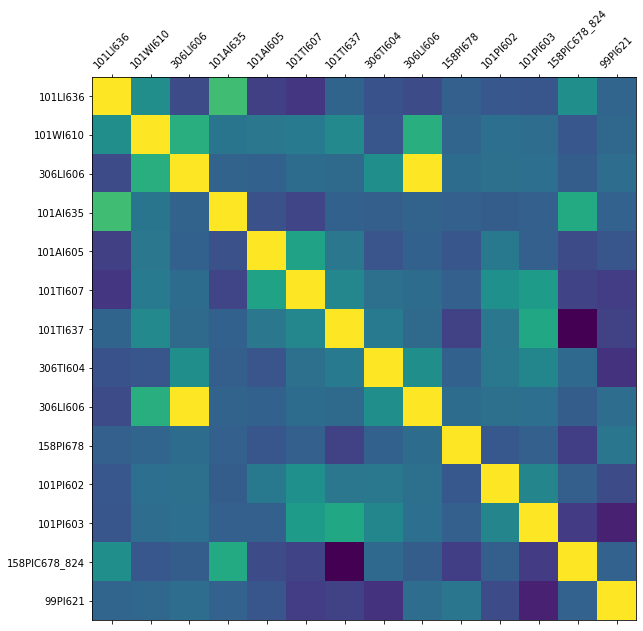

In [42]:
# cols_BHV = [x for x in cols_BHV if (x not in col_irregularities)]
udf.plot_corr(df[cols_BHV])

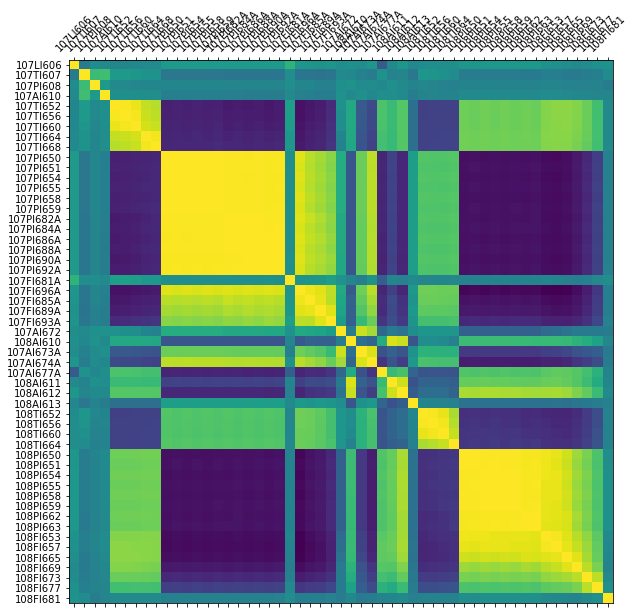

In [43]:
udf.plot_corr(df[cols_NF])

In [44]:
# 0.9 - 82
# 0.8 - 118
# 0.7 - 132
df_7 = udf.eliminate_corr(df,thresh = 0.7)

# of columns before dropping correlated variables:  270
# of columns to drop 127
Dropped columns after correlation analysis: ['306LI606.1', '158PI651', '158PI653', '158PI655', '158PI663', '159PI651', '159PI653', '159PI655', '159PI663', '160PI651', '160PI653', '160PI655', '160PI663', '161PI651', '161PI653', '161PI655', '161PI663', '162FI652', '162FI667', '162PI651', '162PI653', '162PI655', '162PI663', '163FI652', '163FI667', '163PI651', '163PI653', '163PI655', '163PI663', '163TI650', '164FI652', '165PI651', '165PI653', '165PI655', '165PI663', '165TI650', '159CAL4552', '160CAL4552', '161CAL4552', '162CAL4552', '163CAL4551', '163CAL4552', '164CAL4552', '165CAL4552', 'DWTOTALE', 'PERMTOTALE', 'DIAFTOTALE', '158TI670', '118PI917', '118TI609', '118TI972', '118TI973', '118SI623', '118SI633', '118SI643', '118FI638', '118AI621', '118AI616', '118FI601', '118FI602.1', '109FI616', '118FI982', '118FI606', '118CV502', '118CV501', '890PI610', '118FQ602', '118FI912', '118PI629', '118PI628', '118PI951'

In [45]:
df.shape

(48951, 270)

In [46]:
# df.drop(columns=['progress_perc'],inplace=True)
# Insert the progress column which measures progress in percentage terms
df.insert(6, 'progress_perc', round(((df.timestamp_index / df.processing_time_mins)*100),0).astype(int))

In [47]:
df_7.insert(6, 'progress_perc', round(((df_7.timestamp_index / df_7.processing_time_mins)*100),0).astype(int))

In [48]:
df_7.columns

Index(['id', 'start_date', 'end_date', 'processing_time_mins', 'result',
       'timestamp_index', 'progress_perc', 'timeseries', '101LI636',
       '101WI610',
       ...
       '107AI610', '107TI652', '107PI650', '107FI681A', '107AI672', '108AI610',
       '107AI677A', '108AI613', '108TI652', '108FI681'],
      dtype='object', length=144)

In [49]:
df_std= df_7.groupby(
            ['id', 'start_date', 'end_date', 'processing_time_mins', 'result', 'progress_perc']
            )[df_7.columns[8:].tolist()].mean().reset_index()

In [50]:
df_7.columns[8:].tolist()

['101LI636',
 '101WI610',
 '306LI606',
 '101AI635',
 '101AI605',
 '101TI607',
 '101TI637',
 '306TI604',
 '158PI678',
 '101PI602',
 '101PI603',
 '158PIC678_823',
 '158PIC678_824',
 '99TI620',
 '99PI621',
 '99AI622',
 '99AI623',
 '99AI624',
 '164FI656',
 '164FI666',
 '164FI667',
 '164PI651',
 '164PI653',
 '164PI655',
 '164PI663',
 '164TI650',
 '164TIC650',
 '165FI652',
 '158FI652',
 '158FI654',
 '158FI656',
 '158FI666',
 '158FI667',
 '158FI679P',
 '158TI650',
 '158TIC650',
 '159FI652',
 '159FI654',
 '159FI656',
 '159FI666',
 '159FI667',
 '159TI650',
 '159TIC650',
 '160FI652',
 '160FI654',
 '160FI656',
 '160FI666',
 '160FI667',
 '160TI650',
 '160TIC650',
 '161FI652',
 '161FI654',
 '161FI656',
 '161FI666',
 '161FI667',
 '161TI650',
 '161TIC650',
 '162FI654',
 '162FI656',
 '162FI666',
 '162TI650',
 '162TIC650',
 '163FI654',
 '163FI656',
 '163FI666',
 '163TIC650',
 '164FI654',
 '165FI654',
 '165FI656',
 '165FI666',
 '165FI667',
 '165TIC650',
 '158CAL4551',
 '158CAL4552',
 '159CAL4551',
 '160

In [51]:
display(df_7.groupby(['id'])['timestamp_index'].max().describe())

count     37.00000
mean    1322.00000
std      193.93813
min      904.00000
25%     1215.00000
50%     1327.00000
75%     1410.00000
max     1735.00000
Name: timestamp_index, dtype: float64

In [57]:
df_std.to_csv("suanfarma_std_data.csv")

In [58]:
df_std

,id,start_date,end_date,processing_time_mins,result,progress_perc,101LI636,101WI610,306LI606,101AI635,...,107AI610,107TI652,107PI650,107FI681A,107AI672,108AI610,107AI677A,108AI613,108TI652,108FI681
0,1511,2021-08-12 15:45:00,2021-08-13 10:35:00,1131.00000,0.77300,0,82531.32292,24786.71615,0.00000,5.52282,...,5.02439,27.52570,0.16841,38.51433,8.18091,9.24892,0.01092,0.16112,20.95501,0.10132
1,1511,2021-08-12 15:45:00,2021-08-13 10:35:00,1131.00000,0.77300,1,86361.80966,35543.35689,0.00000,5.53747,...,5.02768,27.58810,0.16802,38.51433,8.20538,9.23789,0.01128,0.16101,21.05503,0.10235
2,1511,2021-08-12 15:45:00,2021-08-13 10:35:00,1131.00000,0.77300,2,90133.01563,44252.39421,0.00000,5.55600,...,5.02874,22.27590,4.62384,4069.85629,3.06209,9.25953,0.01099,0.16012,21.17525,0.10133
3,1511,2021-08-12 15:45:00,2021-08-13 10:35:00,1131.00000,0.77300,3,90279.79049,46783.28445,0.00000,5.57116,...,5.02887,16.23502,7.44261,4024.31817,0.00902,9.24134,0.01137,0.15847,21.28022,0.10343
4,1511,2021-08-12 15:45:00,2021-08-13 10:35:00,1131.00000,0.77300,4,90377.45454,46788.22337,0.00000,5.58247,...,5.04751,18.11558,0.17934,2032.22303,0.00777,9.24618,0.00615,0.15805,21.38819,0.10347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3732,1949,2021-10-04 03:20:00,2021-10-05 00:59:00,1300.00000,0.75900,96,2147.50017,1436.28600,0.00000,3.66908,...,4.73674,20.53515,2.71718,5738.07520,3.97162,9.46286,-0.00226,0.17852,22.03046,0.09735
3733,1949,2021-10-04 03:20:00,2021-10-05 00:59:00,1300.00000,0.75900,97,2171.54314,1436.14417,0.00000,3.69113,...,4.42327,40.46828,7.67689,10651.87583,10.13971,9.47245,-0.00106,0.17782,22.03977,0.10003
3734,1949,2021-10-04 03:20:00,2021-10-05 00:59:00,1300.00000,0.75900,98,2192.02930,1437.75439,0.00000,3.71110,...,5.64344,41.46387,3.75644,10698.88815,9.98288,9.47692,-0.00074,0.17807,22.05472,0.09627
3735,1949,2021-10-04 03:20:00,2021-10-05 00:59:00,1300.00000,0.75900,99,2222.30615,1435.66209,0.00000,3.73083,...,6.28505,40.68239,2.87978,10684.64814,9.78141,9.47135,-0.00050,0.17808,22.05866,0.10090


In [60]:
import numpy as np
import matplotlib.pylab as plt
import ruptures as rpt

In [61]:

# creation of data
n, dim = 500, 3  # number of samples, dimension
n_bkps, sigma = 3, 5  # number of change points, noise standart deviation
signal, bkps = rpt.pw_constant(n, dim, n_bkps, noise_std=sigma)

In [66]:
signal.shape

(500, 3)

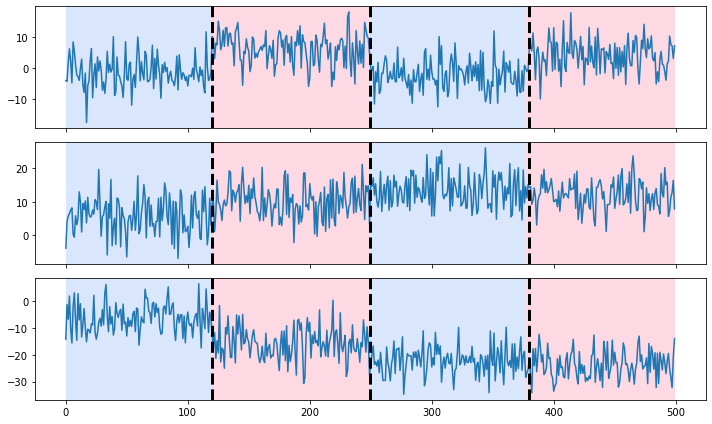

In [68]:
# change point detection
model = "l2"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.BottomUp(model=model).fit(signal)
my_bkps = algo.predict(n_bkps=3)

# show results
rpt.show.display(signal, bkps, my_bkps, figsize=(10, 6))
plt.show()

In [65]:
df_std["101LI636"].values

array([82531.32291833, 86361.80966182, 90133.01562667, ...,
        2192.02929688,  2222.30615234,  2240.19893392])

In [79]:
df_std

,id,start_date,end_date,processing_time_mins,result,progress_perc,101LI636,101WI610,306LI606,101AI635,...,107AI610,107TI652,107PI650,107FI681A,107AI672,108AI610,107AI677A,108AI613,108TI652,108FI681
0,1511,2021-08-12 15:45:00,2021-08-13 10:35:00,1131.00000,0.77300,0,82531.32292,24786.71615,0.00000,5.52282,...,5.02439,27.52570,0.16841,38.51433,8.18091,9.24892,0.01092,0.16112,20.95501,0.10132
1,1511,2021-08-12 15:45:00,2021-08-13 10:35:00,1131.00000,0.77300,1,86361.80966,35543.35689,0.00000,5.53747,...,5.02768,27.58810,0.16802,38.51433,8.20538,9.23789,0.01128,0.16101,21.05503,0.10235
2,1511,2021-08-12 15:45:00,2021-08-13 10:35:00,1131.00000,0.77300,2,90133.01563,44252.39421,0.00000,5.55600,...,5.02874,22.27590,4.62384,4069.85629,3.06209,9.25953,0.01099,0.16012,21.17525,0.10133
3,1511,2021-08-12 15:45:00,2021-08-13 10:35:00,1131.00000,0.77300,3,90279.79049,46783.28445,0.00000,5.57116,...,5.02887,16.23502,7.44261,4024.31817,0.00902,9.24134,0.01137,0.15847,21.28022,0.10343
4,1511,2021-08-12 15:45:00,2021-08-13 10:35:00,1131.00000,0.77300,4,90377.45454,46788.22337,0.00000,5.58247,...,5.04751,18.11558,0.17934,2032.22303,0.00777,9.24618,0.00615,0.15805,21.38819,0.10347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3732,1949,2021-10-04 03:20:00,2021-10-05 00:59:00,1300.00000,0.75900,96,2147.50017,1436.28600,0.00000,3.66908,...,4.73674,20.53515,2.71718,5738.07520,3.97162,9.46286,-0.00226,0.17852,22.03046,0.09735
3733,1949,2021-10-04 03:20:00,2021-10-05 00:59:00,1300.00000,0.75900,97,2171.54314,1436.14417,0.00000,3.69113,...,4.42327,40.46828,7.67689,10651.87583,10.13971,9.47245,-0.00106,0.17782,22.03977,0.10003
3734,1949,2021-10-04 03:20:00,2021-10-05 00:59:00,1300.00000,0.75900,98,2192.02930,1437.75439,0.00000,3.71110,...,5.64344,41.46387,3.75644,10698.88815,9.98288,9.47692,-0.00074,0.17807,22.05472,0.09627
3735,1949,2021-10-04 03:20:00,2021-10-05 00:59:00,1300.00000,0.75900,99,2222.30615,1435.66209,0.00000,3.73083,...,6.28505,40.68239,2.87978,10684.64814,9.78141,9.47135,-0.00050,0.17808,22.05866,0.10090


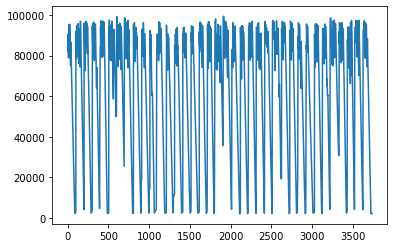

In [74]:
plt.plot(df_std["101LI636"].values)

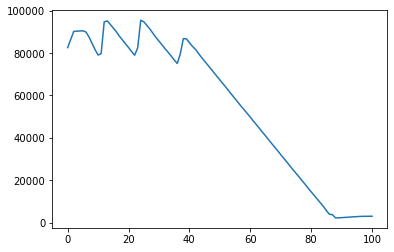

In [87]:
plt.plot(df_std[df_std["id"]=="1511"]["101LI636"].values)

In [189]:
# creation of data
n, dim = 500, 3  # number of samples, dimension
n_bkps, sigma = 3, 5  # number of change points, noise standart deviation
signal, bkps = rpt.pw_constant(n, dim, n_bkps, noise_std=sigma)

In [190]:
bkps

[122, 246, 369, 500]

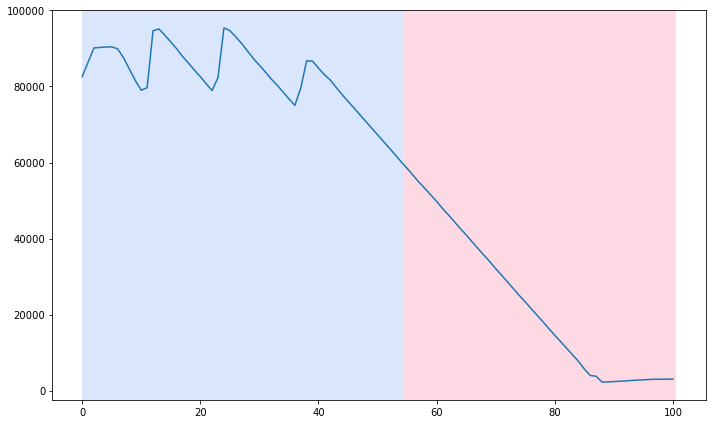

In [198]:
# change point detection
n_bkps, sigma = 1, 3  # number of change points, noise standart deviation
model = "l1"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.BottomUp(model=model).fit(df_std[df_std["id"]=="1511"]["101LI636"].values)
my_bkps = algo.predict(n_bkps=1)

# show results
rpt.show.display(df_std[df_std["id"]=="1511"]["101LI636"] ,my_bkps, figsize=(10, 6))
plt.show()

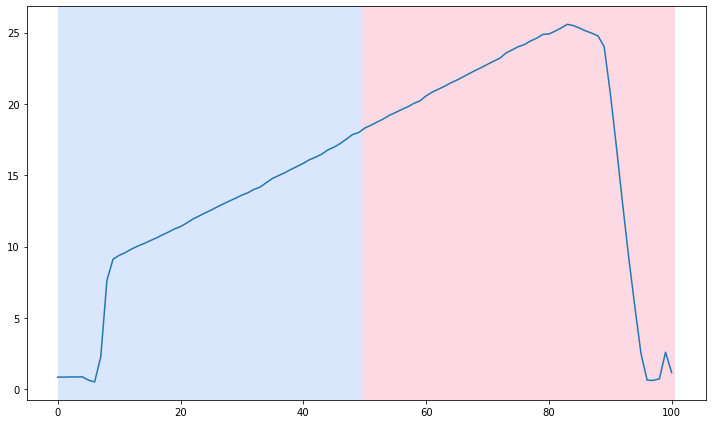

In [200]:
# change point detection
n_bkps, sigma = 1, 3  # number of change points, noise standart deviation
model = "l1"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.BottomUp(model=model).fit(df_std[df_std["id"]=="1511"]["107LI606"].values)
my_bkps = algo.predict(n_bkps=1)

# show results
rpt.show.display(df_std[df_std["id"]=="1511"]["107LI606"] ,my_bkps, figsize=(10, 6))
plt.show()

In [96]:
df_std[df_std["id"]=="1511"][["progress_perc","101LI636"]].progress_perc.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [136]:
import time
time_values=list()
for i in range(101):
    time_values.append(time.strftime('%H:%M:%S', time.gmtime(i)))
    

In [201]:
time_val=pd.DataFrame(time_values)
test=df_std[df_std["id"]=="1511"][["107LI606"]]
test=pd.concat([test,time_val],axis=1)
test.columns=["107LI606","time"]
test.loc[:,['time','107LI606']]

,time,107LI606
0,00:00:00,0.85258
1,00:00:01,0.85207
2,00:00:02,0.86522
3,00:00:03,0.86246
4,00:00:04,0.86986
...,...,...
96,00:01:36,0.63924
97,00:01:37,0.62170
98,00:01:38,0.73520
99,00:01:39,2.59457


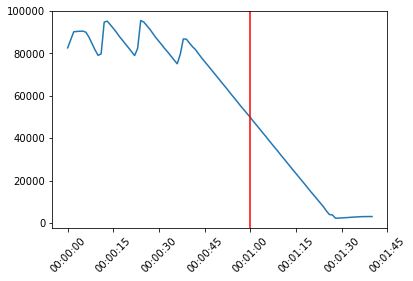

In [170]:
from kats.consts import TimeSeriesData
from kats.detectors.cusum_detection import CUSUMDetector
tsd = TimeSeriesData(test.loc[:,['time','101LI636']])
detector = CUSUMDetector(tsd)
change_points = detector.detector(change_directions=["decrease"])

plt.xticks(rotation=45)
detector.plot(change_points)
plt.show()

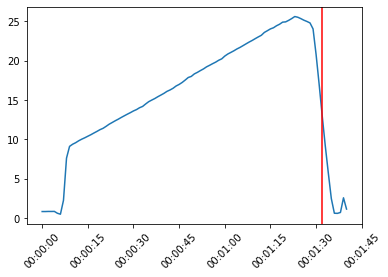

In [202]:
from kats.consts import TimeSeriesData
from kats.detectors.cusum_detection import CUSUMDetector
tsd = TimeSeriesData(test.loc[:,['time','107LI606']])
detector = CUSUMDetector(tsd)
change_points = detector.detector(change_directions=["decrease"])

plt.xticks(rotation=45)
detector.plot(change_points)
plt.show()

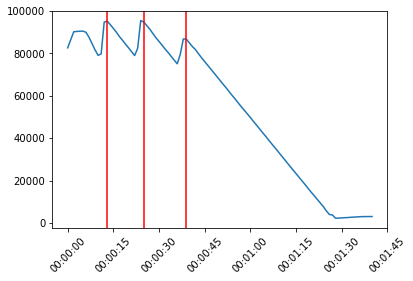

In [167]:

# import package
from kats.detectors.robust_stat_detection import RobustStatDetector

tsd = TimeSeriesData(test.loc[:,['time','101LI636']])

detector = RobustStatDetector(tsd)
# even setting the p_value to be 0.1 it cannot detect the first change point, while there are already many FPs in the results
changepoints = detector.detector(p_value_cutoff = 0.05, comparison_window=2)

plt.xticks(rotation=45)
detector.plot(changepoints)
plt.show()